In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image_data = nib.load('../images/FLAIR.nii.gz').get_fdata()

## Diferiencias centradas

In [3]:
def median_filter_with_edges(image_data):
    filtered_image = np.zeros_like(image_data)
    dfdx = np.zeros_like(image_data)
    dfdy = np.zeros_like(image_data)
    dfdz = np.zeros_like(image_data)

    # Calculate gradients for edge handling
    for x in range(1, image_data.shape[0]-1):
        for y in range(1, image_data.shape[1]-1):
            for z in range(1, image_data.shape[2]-1):
                dfdx[x, y, z] = image_data[x+1, y, z] - image_data[x-1, y, z]
                dfdy[x, y, z] = image_data[x, y+1, z] - image_data[x, y-1, z]
                dfdz[x, y, z] = image_data[x, y, z+1] - image_data[x, y, z-1]

    # Apply median filter with edge handling
    for x in range(1, image_data.shape[0]-1):
        for y in range(1, image_data.shape[1]-1):
            for z in range(1, image_data.shape[2]-1):
                neighborhood = image_data[x-1:x+2, y-1:y+2, z-1:z+2]
                new_neighborhood = np.sort(neighborhood)
                median_value = np.median(new_neighborhood)

                # Adjust median value for edge pixels
                if x == 1:
                    median_value += dfdx[x, y, z]
                if y == 1:
                    median_value += dfdy[x, y, z]
                if z == 1:
                    median_value += dfdz[x, y, z]

                filtered_image[x, y, z] = median_value

    return filtered_image

In [4]:
def mean_filter_with_edges(image_data):
    filtered_image = np.zeros_like(image_data)
    dfdx = np.zeros_like(image_data)
    dfdy = np.zeros_like(image_data)
    dfdz = np.zeros_like(image_data)

    # Calculate gradients for edge handling
    for x in range(1, image_data.shape[0]-1):
        for y in range(1, image_data.shape[1]-1):
            for z in range(1, image_data.shape[2]-1):
                dfdx[x, y, z] = image_data[x+1, y, z] - image_data[x-1, y, z]
                dfdy[x, y, z] = image_data[x, y+1, z] - image_data[x, y-1, z]
                dfdz[x, y, z] = image_data[x, y, z+1] - image_data[x, y, z-1]

    # Apply mean filter with edge handling
    for x in range(1, image_data.shape[0]-1):
        for y in range(1, image_data.shape[1]-1):
            for z in range(1, image_data.shape[2]-1):
                avg = 0
                count = 0

                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        for dz in range(-1, 2):
                            avg += image_data[x+dx, y+dy, z+dz]
                            count += 1

                # Adjust average for edge pixels
                if x == 1:
                    avg += dfdx[x, y, z]
                    count += 1
                if y == 1:
                    avg += dfdy[x, y, z]
                    count += 1
                if z == 1:
                    avg += dfdz[x, y, z]
                    count += 1

                filtered_image[x, y, z] = avg / count

    return filtered_image
   

In [5]:
dfmedian = median_filter_with_edges(image_data)
dfmean = mean_filter_with_edges(image_data)

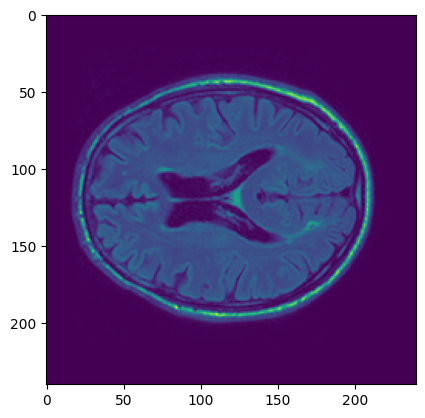

In [6]:
plt.imshow(image_data[:,:,24])

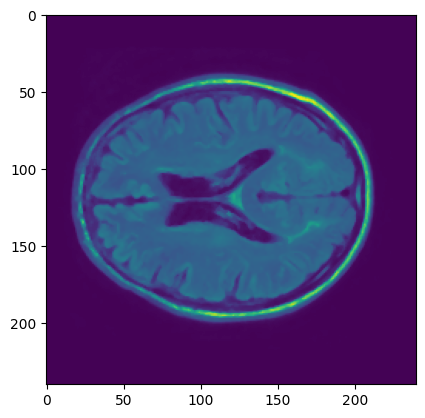

In [7]:
plt.imshow(dfmedian[:,:,24])

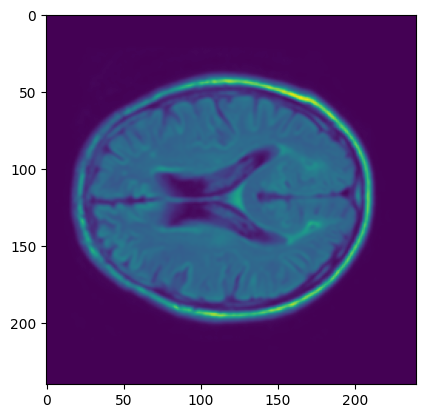

In [8]:
plt.imshow(dfmean[:,:,24])